<a href="https://colab.research.google.com/github/slowvak/AI-Deep-Learning-Lab/blob/master/Back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
from copy import deepcopy
import matplotlib.pyplot as plt

#x = np.array([[1,1]])
#y = np.array([[0]])

x = np.array([[1,2],[3,4],[5,6],[7,8]])
y = np.array([[3],[7],[11],[15]])

In [2]:
# this is the forward pass

def feed_forward(inputs, outputs, weights):     
    pre_hidden = np.dot(inputs,weights[0])+ weights[1]
    hidden = 1/(1+np.exp(-pre_hidden))
    out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [3]:
# this is the function to update the weights

def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

In [4]:
# create some random values to start
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

Text(0.5, 1.0, 'Loss over increasing number of epochs')

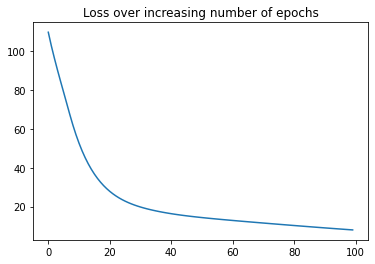

In [5]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

In [6]:
#print out the learned weights
W

[array([[ 0.629593  , -0.47275043,  0.4066274 ],
        [-0.05521611, -0.30134493,  0.10492609]], dtype=float32),
 array([-1.0832006,  0.6705534, -0.826248 ], dtype=float32),
 array([[ 4.4476113 ],
        [-0.59486514],
        [ 3.4449153 ]], dtype=float32),
 array([3.2597551], dtype=float32)]

In [7]:
pre_hidden = np.dot(x,W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
out = np.dot(hidden, W[2]) + W[3]

In [8]:
out

array([[ 6.17694792],
       [ 8.42860969],
       [ 9.99350168],
       [10.72591381]])

# Simple network in PyTorch for comparison


In [9]:
import torch
import torch.nn as nn

In [10]:
# in this case, we will train the network to do addition
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# load the tensors into GPU memory
X = X.to(device)
Y = Y.to(device)

In [12]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

mynet = MyNeuralNet().to(device)

In [13]:
loss_func = nn.MSELoss()


In [14]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)


tensor(82.2504, grad_fn=<MseLossBackward0>)


In [15]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [16]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    # must convert back to numpy for plot to work
    loss_history.append(loss_value.detach().numpy())

Text(0, 0.5, 'loss value')

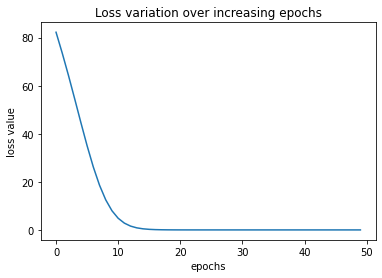

In [17]:


plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')